In [19]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("iris.csv")

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df["species"] = df["species"].factorize()[0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['species'], axis=1),df['species'],test_size=0.3,random_state=12)

In [17]:
classifier = XGBClassifier(random_state=123)
model = classifier.fit(X_train, y_train)

[13:16:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


       Features  weight      gain     cover  total_gain  total_cover  f-score
0  petal_length     131  2.761083  9.931269  361.701927  1300.996229      131
1   petal_width     112  0.456920  7.043550   51.175093   788.877613      112
2  sepal_length      58  0.080412  3.242073    4.663888   188.040244       58
3   sepal_width      68  0.070053  3.328076    4.763591   226.309166       68


'z = df.columns\nfor i in z:\n    sns.displot(df, x=str(i), hue="y",bins=20)'

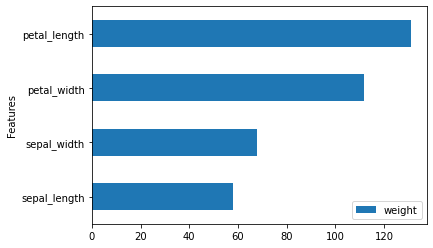

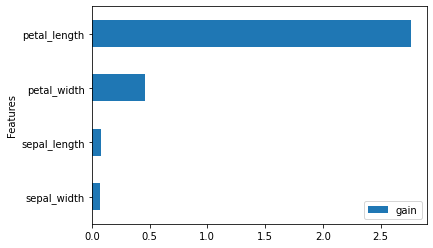

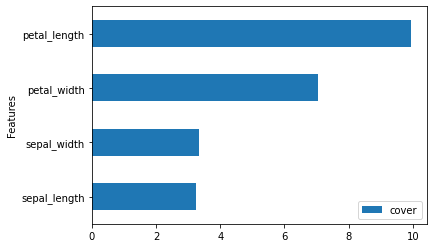

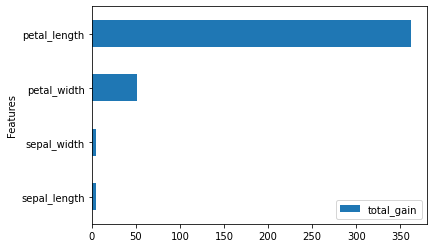

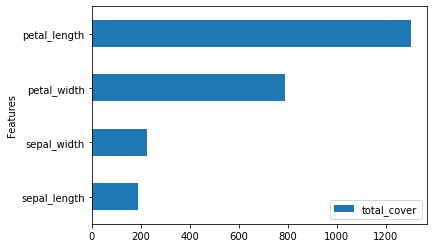

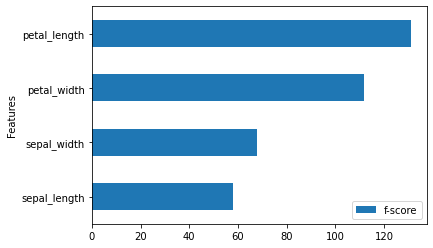

In [21]:
#-----------  Feature Importance Calculation (Xgboost) ------------#

a=model.get_booster().get_score(importance_type='weight')
weight =pd.DataFrame(a.items(), columns=['Features', 'weight'])

a=model.get_booster().get_score(importance_type='gain')
gain =pd.DataFrame(a.items(), columns=['Features', 'gain'])

a=model.get_booster().get_score(importance_type='cover')
cover =pd.DataFrame(a.items(), columns=['Features', 'cover'])

a=model.get_booster().get_score(importance_type='total_gain')
total_gain =pd.DataFrame(a.items(), columns=['Features', 'total_gain'])

a=model.get_booster().get_score(importance_type='total_cover')
total_cover =pd.DataFrame(a.items(), columns=['Features', 'total_cover'])

a=model.get_booster().get_fscore()
fscore =pd.DataFrame(a.items(), columns=['Features', 'f-score'])

gw=pd.merge(weight, gain, how='inner', on=['Features'])

ct=pd.merge(cover, total_gain, how='inner', on=['Features'])

gc=pd.merge(gw, ct, how='inner', on=['Features'])

bb=pd.merge(gc, total_cover, how='inner', on=['Features'])

feature_importance=pd.merge(bb, fscore, how='inner', on=['Features'])

del a, gw, ct, gc, bb, fscore, weight, gain, total_gain,total_cover

print(feature_importance)
a=feature_importance.columns
a=a.drop("Features")
for i in a:
    feature_importance.head(20)[["Features",str(i)]].sort_values(by=str(i),ascending=True).plot("Features",kind='barh')
    plt.legend(loc='lower right')
    
"""z = df.columns
for i in z:
    sns.displot(df, x=str(i), hue="y",bins=20)"""